<a href="https://colab.research.google.com/github/Ihalagedara/FYP2-IDS/blob/main/loss_value_with_77_parameters_with_accuracy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
#import kerastuner as kt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.losses import MeanSquaredLogarithmicError

## testing

In [45]:
model = tf.keras.models.load_model("/content/drive/MyDrive/FYP2/Colab/model save/AE_model_11102023_v_2_2")#/content/drive/MyDrive/FYP2/Colab/model save/AE_model_11102023_v_2_1   #/content/drive/Shareddrives/FYP IDS SDN/FYP ML/Saved Models/AE_model_11102023_v_2

In [46]:
model.summary()

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 58)                1597072   
                                                                 
 sequential_2 (Sequential)   (None, 77)                1597091   
                                                                 
Total params: 3194163 (12.18 MB)
Trainable params: 3194163 (12.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
for i in range(len(model.get_weights())):
  print(len(model.get_weights()[i]))


77
126
126
460
460
680
680
148
148
534
534
762
762
536
536
228
228
334
334
58
58
334
334
228
228
536
536
762
762
534
534
148
148
680
680
460
460
126
126
77


In [48]:
def cor(true_val, Pred_val):
  corr = []
  for i in range(len(true_val)):
    corr.append(np.abs(np.corrcoef(true_val[i], Pred_val[i])[0,1]))

  return np.array(corr)

In [49]:
#loss
def loss(true_val,Pred_val):
  #loss1 = tf.keras.losses.mean_squared_logarithmic_error(true_val, Pred_val)
  loss1 = tf.keras.losses.mean_squared_logarithmic_error(true_val, Pred_val) - 0.3095703125*np.abs(cor(true_val, Pred_val))
  return loss1

### normal

In [50]:
data = pd.read_csv('/content/drive/Shareddrives/FYP IDS SDN/FYP ML/InSDN_DatasetCSV/new_dataset.csv', sep=",")
data = data.drop(['Flow ID','Src IP','Src Port','Dst IP', 'Dst Port', 'Timestamp'], axis=1)
#selected_features = ['Protocol', 'Tot Fwd Pkts', 'Flow Pkts/s', 'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkts/s', 'Pkt Len Max', 'Init Bwd Win Byts' , 'Label']
#data = data.drop(columns=data.columns.difference(selected_features))
condition4 = data['Label'] != 'Normal'
data = data.drop(data[condition4].index)
y_data_normal = data["Label"]
scaler = StandardScaler()
data_normal = data.drop(["Label"],axis=1)
data_scaled = scaler.fit(data_normal)
data_normal = data_scaled.transform(data_normal)

In [51]:
reconstructions_normal = model.predict(np.array(data_normal))
mse_normal = loss(data_normal , reconstructions_normal)

2139/2139 [==============================] - 27s 13ms/step


### bfa

In [52]:
data = pd.read_csv('/content/drive/Shareddrives/FYP IDS SDN/FYP ML/InSDN_DatasetCSV/new_dataset.csv', sep=",")
data = data.drop(['Flow ID','Src IP','Src Port','Dst IP', 'Dst Port', 'Timestamp'], axis=1)
selected_features = ['Protocol', 'Tot Fwd Pkts', 'Flow Pkts/s', 'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkts/s', 'Pkt Len Max', 'Init Bwd Win Byts' , 'Label']
#data = data.drop(columns=data.columns.difference(selected_features))
condition4 = data['Label'] != 'BFA'
data = data.drop(data[condition4].index)
y_data_bfa = data["Label"]
data_bfa = data.drop(["Label"],axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit(data_bfa)
data_bfa = data_scaled.transform(data_bfa)

In [53]:
reconstructions_bfa = model.predict(np.array(data_bfa))
mse_bfa = loss(data_bfa , reconstructions_bfa)

44/44 [==============================] - 1s 20ms/step


### ddos

In [54]:
data = pd.read_csv('/content/drive/Shareddrives/FYP IDS SDN/FYP ML/InSDN_DatasetCSV/new_dataset.csv', sep=",")
data = data.drop(['Flow ID','Src IP','Src Port','Dst IP', 'Dst Port', 'Timestamp'], axis=1)
selected_features = ['Protocol', 'Tot Fwd Pkts', 'Flow Pkts/s', 'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkts/s', 'Pkt Len Max', 'Init Bwd Win Byts' , 'Label']
#data = data.drop(columns=data.columns.difference(selected_features))
condition4 = data['Label'] != 'DDoS '
condition1 = data['Label'] != 'DDoS'
data = data.drop(data[condition4 & condition1].index)
y_data_ddos = data["Label"]
data_ddos = data.drop(["Label"],axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit(data_ddos)
data_ddos = data_scaled.transform(data_ddos)

In [55]:
reconstructions_ddos = model.predict(np.array(data_ddos))
mse_ddos = loss(data_ddos, reconstructions_ddos)


3811/3811 [==============================] - 48s 13ms/step


### dos

In [56]:
data = pd.read_csv('/content/drive/Shareddrives/FYP IDS SDN/FYP ML/InSDN_DatasetCSV/new_dataset.csv', sep=",")
data = data.drop(['Flow ID','Src IP','Src Port','Dst IP', 'Dst Port', 'Timestamp'], axis=1)
selected_features = ['Protocol', 'Tot Fwd Pkts', 'Flow Pkts/s', 'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkts/s', 'Pkt Len Max', 'Init Bwd Win Byts' , 'Label']
#data = data.drop(columns=data.columns.difference(selected_features))
condition4 = data['Label'] != 'DoS'
data = data.drop(data[condition4].index)
y_data_dos = data["Label"]
data_dos = data.drop(["Label"],axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit(data_dos)
data_dos = data_scaled.transform(data_ddos)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
reconstructions_dos = model.predict(np.array(data_dos))
mse_dos = loss(data_dos ,reconstructions_dos)


3811/3811 [==============================] - 54s 14ms/step


### Probe

In [58]:
data = pd.read_csv('/content/drive/Shareddrives/FYP IDS SDN/FYP ML/InSDN_DatasetCSV/new_dataset.csv', sep=",")
data = data.drop(['Flow ID','Src IP','Src Port','Dst IP', 'Dst Port', 'Timestamp'], axis=1)
selected_features = ['Protocol', 'Tot Fwd Pkts', 'Flow Pkts/s', 'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkts/s', 'Pkt Len Max', 'Init Bwd Win Byts' , 'Label']
#data = data.drop(columns=data.columns.difference(selected_features))
condition4 = data['Label'] != 'Probe'
data = data.drop(data[condition4].index)
y_data_prob = data["Label"]
data_prob = data.drop(["Label"],axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit(data_prob)
data_prob = data_scaled.transform(data_prob)

In [59]:
reconstructions_prob = model.predict(np.array(data_prob))
mse_prob = loss(data_prob , reconstructions_prob)

3067/3067 [==============================] - 42s 14ms/step


### Web-Attack

In [60]:
data = pd.read_csv('/content/drive/Shareddrives/FYP IDS SDN/FYP ML/InSDN_DatasetCSV/new_dataset.csv', sep=",")
data = data.drop(['Flow ID','Src IP','Src Port','Dst IP', 'Dst Port', 'Timestamp'], axis=1)
selected_features = ['Protocol', 'Tot Fwd Pkts', 'Flow Pkts/s', 'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkts/s', 'Pkt Len Max', 'Init Bwd Win Byts' , 'Label']
#data = data.drop(columns=data.columns.difference(selected_features))
condition4 = data['Label'] != 'Web-Attack'
data = data.drop(data[condition4].index)
y_data_WebAttack = data["Label"]
data_WebAttack = data.drop(["Label"],axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit(data_WebAttack)
data_WebAttack = data_scaled.transform(data_WebAttack)

In [61]:
reconstructions_WebAttack = model.predict(np.array(data_WebAttack))
mse_WebAttack = loss(data_WebAttack , reconstructions_WebAttack)

6/6 [==============================] - 0s 12ms/step


### BOTNET

In [62]:
data = pd.read_csv('/content/drive/Shareddrives/FYP IDS SDN/FYP ML/InSDN_DatasetCSV/new_dataset.csv', sep=",")
data = data.drop(['Flow ID','Src IP','Src Port','Dst IP', 'Dst Port', 'Timestamp'], axis=1)
selected_features = ['Protocol', 'Tot Fwd Pkts', 'Flow Pkts/s', 'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkts/s', 'Pkt Len Max', 'Init Bwd Win Byts' , 'Label']
#data = data.drop(columns=data.columns.difference(selected_features))
condition4 = data['Label'] != 'BOTNET'
data = data.drop(data[condition4].index)
y_data_BOTNET = data["Label"]
data_BOTNET = data.drop(["Label"],axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit(data_BOTNET)
data_BOTNET = data_scaled.transform(data_BOTNET)

In [63]:
reconstructions_BOTNET = model.predict(np.array(data_BOTNET))
mse_BOTNET = loss(data_BOTNET , reconstructions_BOTNET)

6/6 [==============================] - 0s 17ms/step


### U2R

In [64]:
data = pd.read_csv('/content/drive/Shareddrives/FYP IDS SDN/FYP ML/InSDN_DatasetCSV/new_dataset.csv', sep=",")
data = data.drop(['Flow ID','Src IP','Src Port','Dst IP', 'Dst Port', 'Timestamp'], axis=1)
selected_features = ['Protocol', 'Tot Fwd Pkts', 'Flow Pkts/s', 'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkts/s', 'Pkt Len Max', 'Init Bwd Win Byts' , 'Label']
#data = data.drop(columns=data.columns.difference(selected_features))
condition4 = data['Label'] != 'U2R'
data = data.drop(data[condition4].index)
y_data_U2R = data["Label"]
data_U2R = data.drop(["Label"],axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit(data_U2R)
data_U2R = data_scaled.transform(data_U2R)

In [65]:
reconstructions_U2R = model.predict(np.array(data_U2R))
mse_U2R = loss(data_U2R , reconstructions_U2R)

1/1 [==============================] - 0s 30ms/step


In [66]:
#threshold = np.percentile(mse, 95)

#is_anomaly = mse < threshold

### out

In [67]:
print(f"normal \t max {np.max(mse_normal)} \t min {np.min(mse_normal)}")
print(f"mse_bfa \t max {np.max(mse_bfa)} \t min {np.min(mse_bfa)}")
print(f"mse_ddos \t max {np.max(mse_ddos)} \t min {np.min(mse_ddos)}")
print(f"mse_prob \t max {np.max(mse_prob)} \t min {np.min(mse_prob)}")
print(f"mse_WebAttack \t max {np.max(mse_WebAttack)} \t min {np.min(mse_WebAttack)}")
print(f"mse_BOTNET \t max {np.max(mse_BOTNET)} \t min {np.min(mse_BOTNET)}")
print(f"mse_U2R \t max {np.max(mse_U2R)} \t min {np.min(mse_U2R)}")
print(f"mse_dos \t max {np.max(mse_dos)} \t min {np.min(mse_dos)}")

normal 	 max 2.934598684310913 	 min -0.30953535437583923
mse_bfa 	 max 1.472919225692749 	 min -0.15571965277194977
mse_ddos 	 max 3.830650568008423 	 min -0.03104647621512413
mse_prob 	 max 2.2540876865386963 	 min -0.1860577017068863
mse_WebAttack 	 max 0.42943140864372253 	 min -0.16497847437858582
mse_BOTNET 	 max 0.3415701985359192 	 min -0.07735852152109146
mse_U2R 	 max 0.3781217038631439 	 min -0.1840018630027771
mse_dos 	 max 0.4996386766433716 	 min 0.10482321679592133


In [68]:
threshold_normal = np.percentile(mse_normal, 85)
threshold_bfa = np.percentile(mse_bfa, 95)
threshold_ddos = np.percentile(mse_ddos, 95)
threshold_prob = np.percentile(mse_prob, 95)
threshold_WebAttack = np.percentile(mse_WebAttack, 95)
threshold_BOTNET = np.percentile(mse_BOTNET, 95)
threshold_U2R = np.percentile(mse_U2R, 95)

In [69]:
print(threshold_normal)
print(threshold_bfa)
print(threshold_ddos)
print(threshold_prob)
print(threshold_WebAttack)
print(threshold_BOTNET)
print(threshold_U2R)

-0.22437612488865855
0.18751567006111142
0.11501719057559967
0.16628994941711425
0.11724248453974717
0.31094574481248854
0.3411397397518158


## accuracy

In [70]:
threshold_mae = np.percentile(mse_normal, 95)

In [71]:
anom_normal = mse_normal < threshold_mae
anom_bfa = mse_bfa > threshold_mae
anom_ddos  = mse_ddos > threshold_mae
anom_prob = mse_prob > threshold_mae
anom_WebAttack = mse_WebAttack > threshold_mae
anom_BOTNET = mse_BOTNET >  threshold_mae
anom_U2R = mse_U2R > threshold_mae
anom_dos = mse_dos > threshold_mae

In [72]:
def check(anom):
  count =0
  var_name = [name for name, value in globals().items() if value is anom][0]
  for i in range(len(anom)):
    if np.array(anom)[i]:
      count = count +1

  print(f"{var_name} \t  {count/len(anom)*100:.3f} \t  {len(anom)}")

In [73]:
check(anom_normal)
check(anom_bfa)
check(anom_ddos)
check(anom_prob)
check(anom_WebAttack)
check(anom_BOTNET)
check(anom_U2R)
check(anom_dos)

anom_normal 	  94.994 	  68424
anom_bfa 	  94.021 	  1405
anom_ddos 	  100.000 	  121942
anom_prob 	  99.063 	  98129
anom_WebAttack 	  89.062 	  192
anom_BOTNET 	  100.000 	  164
anom_U2R 	  88.235 	  17
anom_dos 	  100.000 	  121942


## Plots


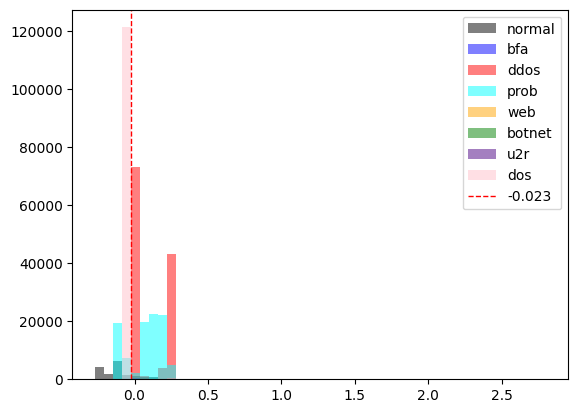

In [32]:
plt.hist(mse_normal, bins=50, label='normal',alpha=0.5, range=[-0.27, 2.8], color = 'black')
plt.hist(mse_bfa, bins=50, label='bfa',alpha=0.5, range=[-0.27, 2.8], color = 'blue')
plt.hist(mse_ddos, bins=50, label='ddos',alpha=0.5, range=[-0.27, 2.8], color = 'red')
plt.hist(mse_prob, bins=50, label='prob',alpha=0.5, range=[-0.27, 2.8], color = 'cyan')
plt.hist(mse_WebAttack, bins=50, label='web',alpha=0.5, range=[-0.27, 2.8], color = 'orange')
plt.hist(mse_BOTNET, bins=50, label='botnet',alpha=0.5, range=[-0.27, 2.8], color = 'green')
plt.hist(mse_U2R, bins=50, label='u2r',alpha=0.5, range=[-0.27, 2.8], color = 'indigo')
plt.hist(mse_dos, bins=50, label='dos',alpha=0.5, range=[-0.27, 2.8], color = 'pink')
plt.axvline(threshold_mae, color='r', linewidth=1, linestyle='dashed', label='{:0.03f}'.format(threshold_mae))
plt.legend()
plt.show()

KeyboardInterrupt: ignored

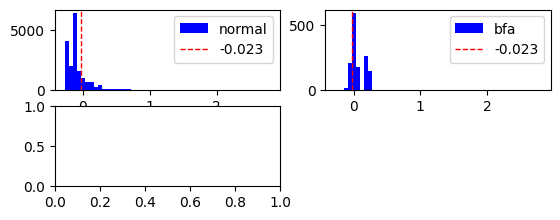

In [33]:
plt.subplot(4, 2, 1)
plt.hist(mse_normal, bins=50, label='normal', range=[-0.27, 2.8], color = 'blue')
plt.axvline(threshold_mae, color='r', linewidth=1, linestyle='dashed', label='{:0.03f}'.format(threshold_mae))
plt.legend()
plt.subplot(4, 2, 2)
plt.hist(mse_bfa, bins=50, label='bfa', range=[-0.27, 2.8], color = 'blue')
plt.axvline(threshold_mae, color='r', linewidth=1, linestyle='dashed', label='{:0.03f}'.format(threshold_mae))
plt.legend()
plt.subplot(4, 2, 3)
plt.hist(mse_ddos, bins=50, label='ddos', range=[-0.27, 2.8], color = 'blue')
plt.axvline(threshold_mae, color='r', linewidth=1, linestyle='dashed', label='{:0.03f}'.format(threshold_mae))
plt.legend()
plt.subplot(4, 2, 4)
plt.hist(mse_prob, bins=50, label='prob', range=[-0.27, 2.8], color = 'blue')
plt.axvline(threshold_mae, color='r', linewidth=1, linestyle='dashed', label='{:0.03f}'.format(threshold_mae))
plt.legend()
plt.subplot(4, 2, 5)
plt.hist(mse_WebAttack, bins=50, label='web', range=[-0.27, 2.8], color = 'blue')
plt.axvline(threshold_mae, color='r', linewidth=1, linestyle='dashed', label='{:0.03f}'.format(threshold_mae))
plt.legend()
plt.subplot(4, 2, 6)
plt.hist(mse_BOTNET, bins=50, label='botnet', range=[-0.27, 2.8], color = 'blue')
plt.axvline(threshold_mae, color='r', linewidth=1, linestyle='dashed', label='{:0.03f}'.format(threshold_mae))
plt.legend()
plt.subplot(4, 2, 7)
plt.hist(mse_U2R, bins=50, label='u2r', range=[-0.27, 2.8], color = 'blue')
plt.axvline(threshold_mae, color='r', linewidth=1, linestyle='dashed', label='{:0.03f}'.format(threshold_mae))
plt.legend()
plt.subplot(4, 2, 8)
plt.hist(mse_dos, bins=50, label='dos', range=[-0.27, 2.8], color = 'blue')
plt.axvline(threshold_mae, color='r', linewidth=1, linestyle='dashed', label='{:0.03f}'.format(threshold_mae))
plt.legend()
plt.show()